# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

from datetime import datetime
import numpy as np

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [5]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [7]:
df = pd.merge(df, diff, on = 'id')
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0,-0.004670,0.177779


### Averages in prices during Off-peak, peak, Mid-peak periods

In [8]:
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var' : 'mean',
    'price_peak_var' : 'mean',
    'price_mid_peak_var' : 'mean',
    'price_off_peak_fix' : 'mean',
    'price_peak_fix' : 'mean',
    'price_mid_peak_fix' : 'mean'
}).reset_index()

In [9]:
mean_prices.head(10)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
5,00126c87cf78d7604278f0a9adeb689e,0.119806,0.099417,0.070304,40.661003,24.396601,16.264402
6,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555
7,00184e957277eeef733a7b563fdabd06,0.147637,0.000000,0.000000,44.266930,0.000000,0.000000
8,001987ed9dbdab4efa274a9c7233e1f4,0.122756,0.102290,0.073031,40.647427,24.388455,16.258972
9,0019baf3ed1242cd99b3cb592030446f,0.267449,0.000000,0.000000,57.961930,0.000000,0.000000


In [12]:
mean_prices['off_peak_to_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_to_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_to_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']

mean_prices['off_peak_to_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_to_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_to_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [13]:
columns = ['id', 'off_peak_to_peak_var_mean_diff', 'peak_to_mid_peak_var_mean_diff', 'off_peak_to_mid_peak_var_mean_diff',
          'off_peak_to_peak_fix_mean_diff', 'peak_to_mid_peak_fix_mean_diff', 'off_peak_to_mid_peak_fix_mean_diff']

df = pd.merge(df, mean_prices[columns], on = 'id')

In [14]:
df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_to_peak_var_mean_diff,peak_to_mid_peak_var_mean_diff,off_peak_to_mid_peak_var_mean_diff,off_peak_to_peak_fix_mean_diff,peak_to_mid_peak_fix_mean_diff,off_peak_to_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,4.423670e+01,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


### Maximum Change in Prices during Off-peak, peak, and Mid-peak prices

In [15]:
mean_prices_by_period = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var' : 'mean',
    'price_peak_var' : 'mean',
    'price_mid_peak_var' : 'mean',
    'price_off_peak_fix' : 'mean',
    'price_peak_fix' : 'mean',
    'price_mid_peak_fix' : 'mean'
}).reset_index()

In [16]:
mean_prices_by_period['off_peak_to_peak_var_mean_diff'] = mean_prices_by_period['price_off_peak_var'] - mean_prices_by_period['price_peak_var']
mean_prices_by_period['peak_to_mid_peak_var_mean_diff'] = mean_prices_by_period['price_peak_var'] - mean_prices_by_period['price_mid_peak_var']
mean_prices_by_period['off_peak_to_mid_peak_var_mean_diff'] = mean_prices_by_period['price_off_peak_var'] - mean_prices_by_period['price_mid_peak_var']

mean_prices_by_period['off_peak_to_peak_fix_mean_diff'] = mean_prices_by_period['price_off_peak_fix'] - mean_prices_by_period['price_peak_fix']
mean_prices_by_period['peak_to_mid_peak_fix_mean_diff'] = mean_prices_by_period['price_peak_fix'] - mean_prices_by_period['price_mid_peak_fix']
mean_prices_by_period['off_peak_to_mid_peak_fix_mean_diff'] = mean_prices_by_period['price_off_peak_fix'] - mean_prices_by_period['price_mid_peak_fix']

In [20]:
max_diff_across_period = mean_prices_by_period.groupby(['id']).agg({
    'off_peak_to_peak_var_mean_diff' : 'max',
    'peak_to_mid_peak_var_mean_diff' : 'max',
    'off_peak_to_mid_peak_var_mean_diff' : 'max',
    'off_peak_to_peak_fix_mean_diff' : 'max',
    'peak_to_mid_peak_fix_mean_diff' : 'max',
    'off_peak_to_mid_peak_fix_mean_diff' : 'max'
}).reset_index()

max_diff_across_period = max_diff_across_period.rename(columns = {
    'off_peak_to_peak_var_mean_diff' : 'off_peak_to_peak_var_max_period_diff',
    'peak_to_mid_peak_var_mean_diff' : 'peak_to_mid_peak_var_max_period_diff',
    'off_peak_to_mid_peak_var_mean_diff' : 'off_peak_to_mid_peak_var_max_period_diff',
    'off_peak_to_peak_fix_mean_diff' : 'off_peak_to_peak_fix_max_period_diff',
    'peak_to_mid_peak_fix_mean_diff' : 'peak_to_mid_peak_fix_max_period_diff',
    'off_peak_to_mid_peak_fix_mean_diff' : 'off_peak_to_mid_peak_fix_max_period_diff'
})

In [22]:
columns = ['id', 'off_peak_to_peak_var_max_period_diff', 'peak_to_mid_peak_var_max_period_diff',
          'off_peak_to_mid_peak_var_max_period_diff', 'off_peak_to_peak_fix_max_period_diff',
          'peak_to_mid_peak_fix_max_period_diff', 'off_peak_to_mid_peak_fix_max_period_diff']

df = pd.merge(df, max_diff_across_period[columns], on = 'id')
df.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_to_mid_peak_var_mean_diff,off_peak_to_peak_fix_mean_diff,peak_to_mid_peak_fix_mean_diff,off_peak_to_mid_peak_fix_mean_diff,off_peak_to_peak_var_max_period_diff,peak_to_mid_peak_var_max_period_diff,off_peak_to_mid_peak_var_max_period_diff,off_peak_to_peak_fix_max_period_diff,peak_to_mid_peak_fix_max_period_diff,off_peak_to_mid_peak_fix_max_period_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.058257,18.590255,7.450670,26.040925,0.060550,0.085483,0.146033,44.266930,8.145775,44.266930
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.149609,44.311375,0.000000,44.311375,0.151367,0.085483,0.151367,44.444710,0.000000,44.444710
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.170512,44.385450,0.000000,44.385450,0.084587,0.089162,0.172468,44.444710,0.000000,44.444710
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.151210,44.400265,0.000000,44.400265,0.153133,0.000000,0.153133,44.444710,0.000000,44.444710
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.051309,16.275263,8.137629,24.412893,0.022225,0.033743,0.055866,16.291555,8.145775,24.437330
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,0.168953,44.266930,0.000000,44.266930,0.082931,0.088815,0.171746,44.266931,0.000000,44.266931
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,0.166061,44.266930,0.000000,44.266930,0.082931,0.085058,0.167989,44.266930,0.000000,44.266930
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,0.049279,16.269833,8.134914,24.404747,0.022581,0.031859,0.054440,16.291555,8.145775,24.437330
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,0.149682,44.311375,0.000000,44.311375,0.151367,0.000000,0.151367,44.444710,0.000000,44.444710
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,0.049593,16.291555,8.145775,24.437330,0.022671,0.031988,0.054659,16.291555,8.145775,24.437330


### Transforming Boolean and Categorical Data

#### Has_Gas?

In [23]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])

In [25]:
df.groupby(['has_gas']).agg({
    'churn' : 'mean'
})

,churn
has_gas,
0,0.100544
1,0.081856


#### Categorical Data - channel_sales

In [26]:
df['channel_sales'] = df['channel_sales'].astype('category')
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [27]:
df = pd.get_dummies(df, columns = ['channel_sales'], prefix = 'channel')
df = df.drop(columns = ['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                        'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head(10)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,peak_to_mid_peak_var_max_period_diff,off_peak_to_mid_peak_var_max_period_diff,off_peak_to_peak_fix_max_period_diff,peak_to_mid_peak_fix_max_period_diff,off_peak_to_mid_peak_fix_max_period_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,0.085483,0.146033,44.266930,8.145775,44.266930,0,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.085483,0.151367,44.444710,0.000000,44.444710,1,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.089162,0.172468,44.444710,0.000000,44.444710,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000,0.153133,44.444710,0.000000,44.444710,0,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,0.033743,0.055866,16.291555,8.145775,24.437330,1,0,0,0,0
5,1aa498825382410b098937d65c4ec26d,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,...,0.088815,0.171746,44.266931,0.000000,44.266931,0,0,0,0,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,...,0.085058,0.167989,44.266930,0.000000,44.266930,0,0,1,0,0
7,01495c955be7ec5e7f3203406785aae0,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751,...,0.031859,0.054440,16.291555,8.145775,24.437330,0,0,1,0,0
8,f53a254b1115634330c12c7fdbf7958a,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,0,...,0.000000,0.151367,44.444710,0.000000,44.444710,0,0,0,0,1
9,10c1b2f97a2d2a6f10299dc213d1a370,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,2188,...,0.031988,0.054659,16.291555,8.145775,24.437330,0,0,0,1,0


#### Categorical Data - origin_up

In [28]:
df['origin_up'] = df['origin_up'].astype('category')
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [29]:
df = pd.get_dummies(df, columns = ['origin_up'], prefix = 'origin')
df = df.drop(columns = ['origin_MISSING', 'origin_usapbepcfoloekilkwsdiboslwaxobdp', 
                        'origin_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head(10)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,peak_to_mid_peak_fix_max_period_diff,off_peak_to_mid_peak_fix_max_period_diff,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_ldkssxwpmemidmecebumciepifcamkci,origin_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,8.145775,44.266930,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,0.000000,44.444710,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,...,0.000000,44.444710,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,...,0.000000,44.444710,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,...,8.145775,24.437330,1,0,0,0,0,1,0,0
5,1aa498825382410b098937d65c4ec26d,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,...,0.000000,44.266931,0,0,0,0,1,0,0,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,...,0.000000,44.266930,0,0,1,0,0,0,0,1
7,01495c955be7ec5e7f3203406785aae0,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751,...,8.145775,24.437330,0,0,1,0,0,0,0,1
8,f53a254b1115634330c12c7fdbf7958a,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,0,...,0.000000,44.444710,0,0,0,0,1,1,0,0
9,10c1b2f97a2d2a6f10299dc213d1a370,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,2188,...,8.145775,24.437330,0,0,0,1,0,0,0,1


###  Transforming Numerical Data (Skewed data as showed in EDA)

In [30]:
skewed_columns = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

In [31]:
df[skewed_columns].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


Use log function to reduce variability of data, convert highly skewed data into a normal distribution

In [32]:
df['cons_12m'] = np.log10(df['cons_12m'] + 1)
df['cons_gas_12m'] = np.log10(df['cons_gas_12m'] + 1)
df['cons_last_month'] = np.log10(df['cons_last_month'] + 1)
df['forecast_cons_12m'] = np.log10(df['forecast_cons_12m'] + 1)
df['forecast_cons_year'] = np.log10(df['forecast_cons_year'] + 1)
df['forecast_meter_rent_12m'] = np.log10(df['forecast_meter_rent_12m'] + 1)


In [33]:
df[skewed_columns].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


#### For - imp_cons

In [35]:
df['imp_cons'].describe()

count    14606.000000
mean       152.786896
std        341.369366
min          0.000000
25%          0.000000
50%         37.395000
75%        193.980000
max      15042.790000
Name: imp_cons, dtype: float64

In [36]:
df['imp_cons'] = np.log10(df['imp_cons'] + 1)

In [37]:
df['imp_cons'].describe()

count    14606.000000
mean         1.240750
std          1.138322
min          0.000000
25%          0.000000
50%          1.584275
75%          2.289990
max          4.177357
Name: imp_cons, dtype: float64

### Tenure

In [38]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143713
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        14606 non-null  object        
 1   cons_12m                                  14606 non-null  float64       
 2   cons_gas_12m                              14606 non-null  float64       
 3   cons_last_month                           14606 non-null  float64       
 4   date_activ                                14606 non-null  datetime64[ns]
 5   date_end                                  14606 non-null  datetime64[ns]
 6   date_modif_prod                           14606 non-null  datetime64[ns]
 7   date_renewal                              14606 non-null  datetime64[ns]
 8   forecast_cons_12m                         14606 non-null  float64       
 9   forecast_cons_year          

Removing DateTime Columns

In [41]:
remove_col = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
new_df = df.drop(columns = remove_col)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        14606 non-null  object 
 1   cons_12m                                  14606 non-null  float64
 2   cons_gas_12m                              14606 non-null  float64
 3   cons_last_month                           14606 non-null  float64
 4   forecast_cons_12m                         14606 non-null  float64
 5   forecast_cons_year                        14606 non-null  float64
 6   forecast_discount_energy                  14606 non-null  float64
 7   forecast_meter_rent_12m                   14606 non-null  float64
 8   forecast_price_energy_off_peak            14606 non-null  float64
 9   forecast_price_energy_peak                14606 non-null  float64
 10  forecast_price_pow_off_peak       

### Correlations

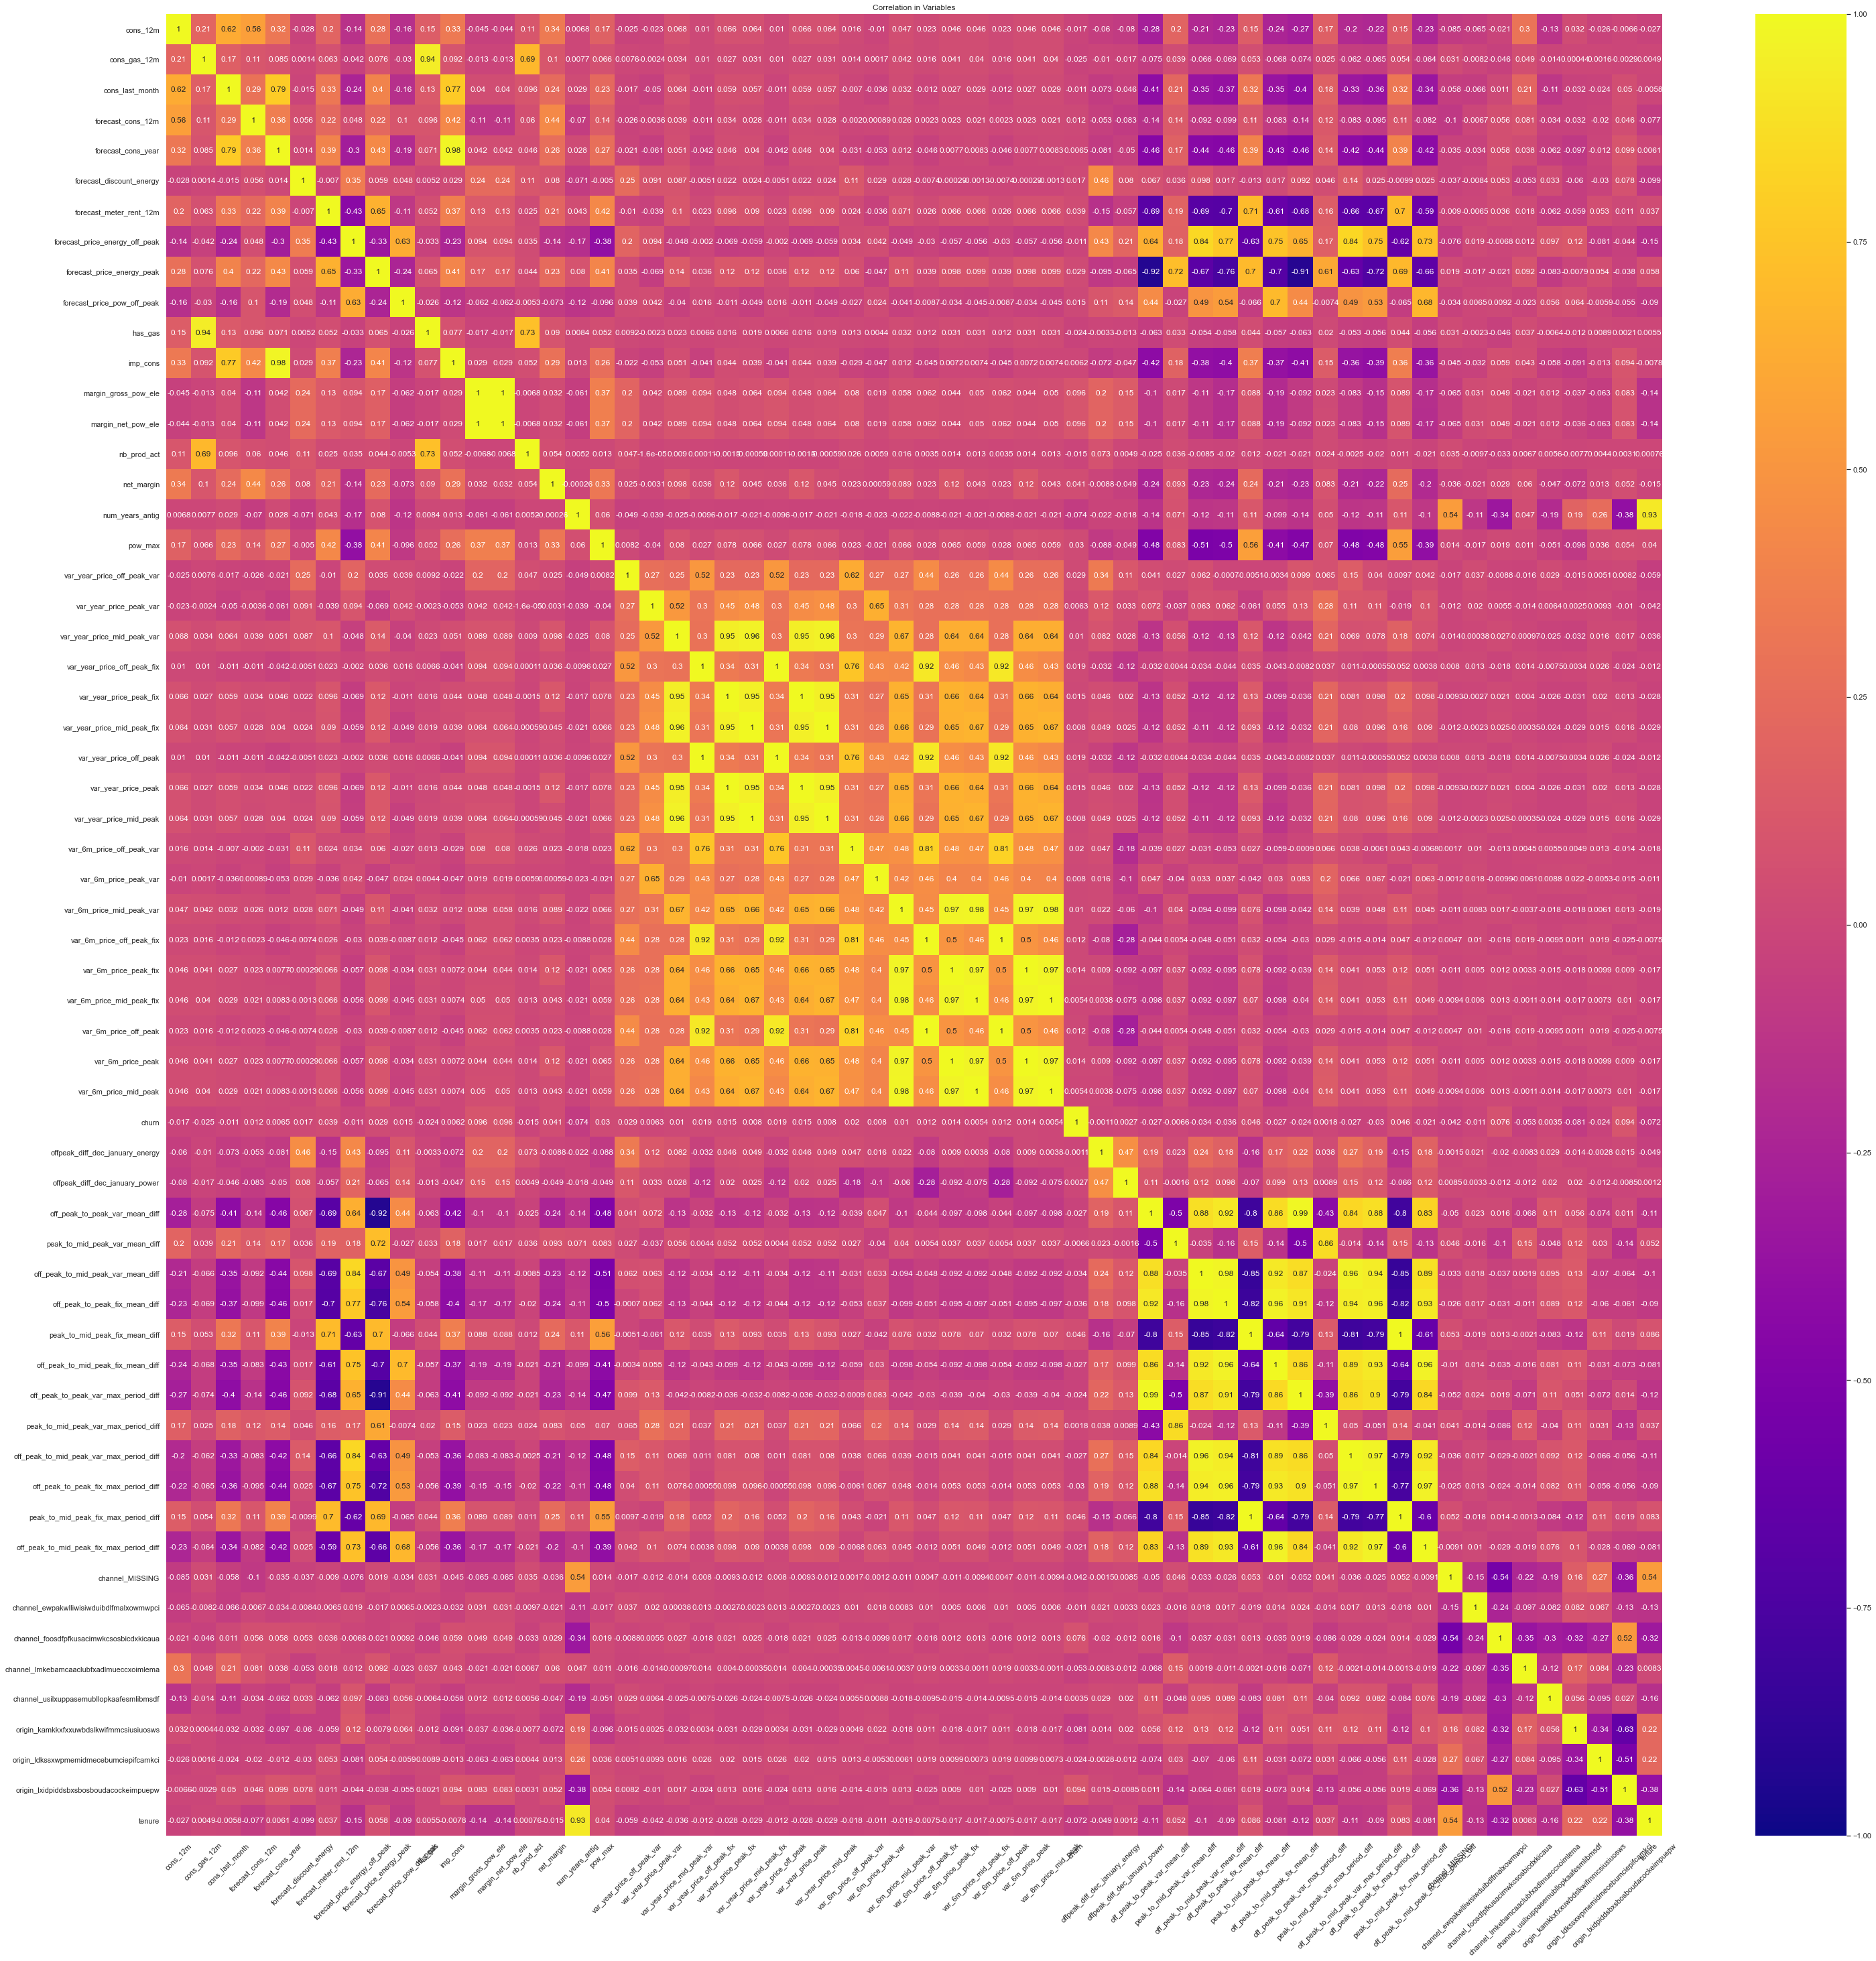

In [43]:
plt.figure(figsize = (50,50))
sns.heatmap(new_df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'plasma')
plt.title('Correlation in Variables')
plt.xticks(rotation='45')
plt.show()